In [1]:
def dijkstra(N, A, c, s):
    R = set()       # Conjunto de nós rotulados
    NR = set(N)     # Conjunto de nós não-rotulados
    d = {i: float('infinity') for i in N}  # Distâncias iniciais como infinito
    p = {i: None for i in N}     # Predecessores
    
    d[s] = 0        # Distância da origem para ela mesma é zero
    p[s] = None     # O nó de origem não tem predecessor
    
    while len(R) < len(N):
        # Encontra o nó em NR com menor distância d
        min_dist = float('infinity')
        i = None
        for j in NR:
            if d[j] < min_dist:
                min_dist = d[j]
                i = j
        
        if i is None:
            break  # Não há mais nós alcançáveis
        
        # Move o nó i de NR para R
        R.add(i)
        NR.remove(i)
        
        # Para cada arco (i,j) com j em NR
        for (u, v) in A:
            if u == i and v in NR:
                j = v
                # Atualiza a distância se encontrarmos um caminho mais curto
                if d[j] > d[i] + c.get((i,j), float('infinity')):
                    d[j] = d[i] + c.get((i,j), float('infinity'))
                    p[j] = i
    
    return d, p


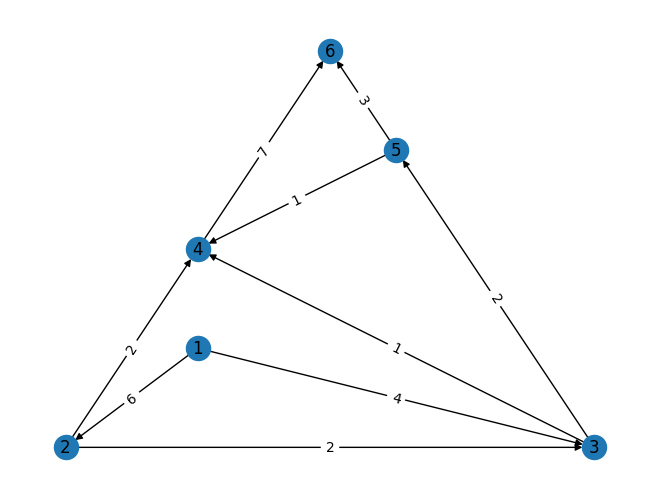

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

N = [1,2,3,4,5,6]
A = [(1,2),(1,3),(2,3),(2,4),(3,4),(3,5),(4,6),(5,4),(5,6)]
c = {(1,2): 6, (1,3): 4, (2,3): 2, (2,4): 2, (3,4): 1, (3,5): 2, (4,6): 7, (5,4): 1, (5,6): 3}
G1 = nx.DiGraph()
G1.add_edges_from(A)

pos1 = nx.planar_layout(G1)
nx.draw_planar(G1, with_labels=True)
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=c)
plt.show()

In [3]:
d, p = dijkstra(N, A, c, 1)

In [4]:
def create_path(p):
    min_path = []
    for j, pred in p.items():
        if pred != None:
            min_path.append((pred, j))
    return min_path

def new_cost(p, c):
    return {(j, i): c[(j, i)] for i, j in p.items() if (j, i) in c}

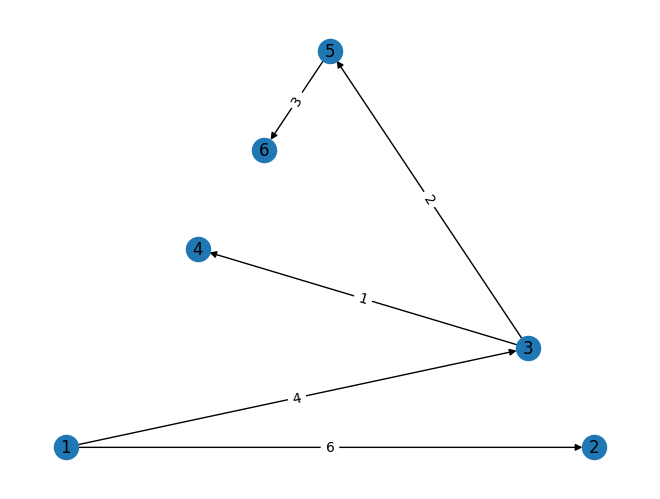

In [5]:
min_P = create_path(p)
new_c = new_cost(p, c)

G2 = nx.DiGraph()
G2.add_edges_from(min_P)

pos2 = nx.planar_layout(G2)
nx.draw_planar(G2, with_labels=True)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=new_c)
plt.show()

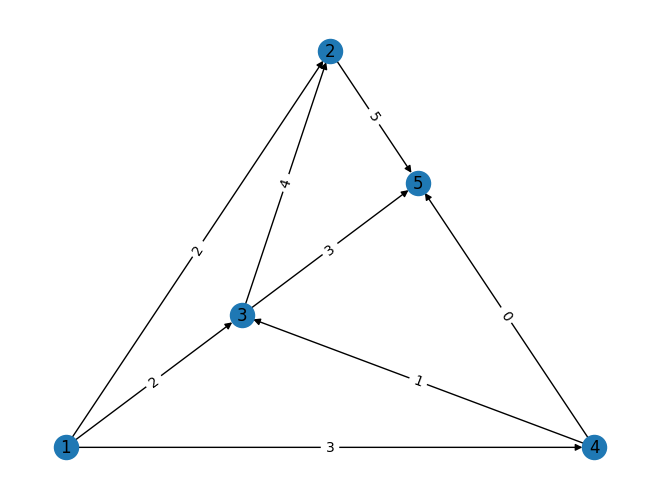

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

N = [1,2,3,4,5,6]
A = [(1,2),(1,3),(1,4),(2,5),(3,2),(3,5),(4,3),(4,5)]
c = {(1,2):2,(1,3):2,(1,4):3,(2,5):5,(3,2):4,(3,5):3,(4,3):1,(4,5):0}
G1 = nx.DiGraph()
G1.add_edges_from(A)

pos1 = nx.planar_layout(G1)
nx.draw_planar(G1, with_labels=True)
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=c)
plt.show()

In [7]:
d, p = dijkstra(N, A, c, 1)

In [9]:
p

{1: None, 2: 1, 3: 1, 4: 1, 5: 4, 6: None}

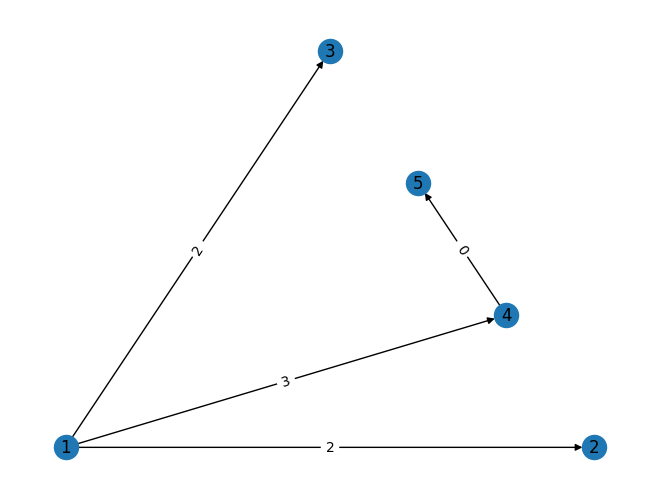

In [8]:
min_P = create_path(p)
new_c = new_cost(p, c)

G2 = nx.DiGraph()
G2.add_edges_from(min_P)

pos2 = nx.planar_layout(G2)
nx.draw_planar(G2, with_labels=True)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=new_c)
plt.show()